## Data Directory

In [41]:
!tree  C:/Users/moawi/Downloads/archive/content/Diabetic_Balanced_Data 


Folder PATH listing
Volume serial number is 5C52-35AE
C:\USERS\MOAWI\DOWNLOADS\ARCHIVE\CONTENT\DIABETIC_BALANCED_DATA
+---test
¦   +---0
¦   +---1
¦   +---2
¦   +---3
¦   +---4
+---train
¦   +---0
¦   +---1
¦   +---2
¦   +---3
¦   +---4
+---val
    +---0
    +---1
    +---2
    +---3
    +---4


## Data Analysis

In [4]:
import os
import pandas as pd

# Define dataset path
BASE_PATH = r"C:\Users\moawi\Downloads\archive\content\Diabetic_Balanced_Data"

def create_image_df(base_path):
    """Creates a DataFrame containing all images from the given directory, merging non-zero classes."""
    data = []

    for split in ["train", "val", "test"]:
        split_path = os.path.join(base_path, split)

        for class_label in sorted(os.listdir(split_path)):  # Loop through class folders
            class_path = os.path.join(split_path, class_label)

            if os.path.isdir(class_path):
                all_images = sorted(os.listdir(class_path))  # Get all images
                # Store image paths and labels
                for img in all_images:
                    img_path = os.path.join(class_path, img)
                    data.append({"Split": split, "Image Path": img_path, "Label": class_label})

    return pd.DataFrame(data)

# Generate DataFrame
df_images = create_image_df(BASE_PATH)

# Display first few rows
print(df_images.head())


   Split                                         Image Path Label
0  train  C:\Users\moawi\Downloads\archive\content\Diabe...     0
1  train  C:\Users\moawi\Downloads\archive\content\Diabe...     0
2  train  C:\Users\moawi\Downloads\archive\content\Diabe...     0
3  train  C:\Users\moawi\Downloads\archive\content\Diabe...     0
4  train  C:\Users\moawi\Downloads\archive\content\Diabe...     0


In [42]:
df_images

,Split,Image Path,Label
0,train,C:\Users\moawi\Downloads\archive\content\Diabe...,0
1,train,C:\Users\moawi\Downloads\archive\content\Diabe...,0
2,train,C:\Users\moawi\Downloads\archive\content\Diabe...,0
3,train,C:\Users\moawi\Downloads\archive\content\Diabe...,0
4,train,C:\Users\moawi\Downloads\archive\content\Diabe...,0
...,...,...,...
49698,test,C:\Users\moawi\Downloads\archive\content\Diabe...,4
49699,test,C:\Users\moawi\Downloads\archive\content\Diabe...,4
49700,test,C:\Users\moawi\Downloads\archive\content\Diabe...,4
49701,test,C:\Users\moawi\Downloads\archive\content\Diabe...,4


## Data Visualisation

In [53]:

import os
import random
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

def plot_dataset_distribution(base_path):
    """
    Counts and plots the number of images in each class across train, val, and test sets.

    Parameters:
    - base_path (str): Path to the dataset directory.
    """
    splits = ["train", "val", "test"]
    class_counts = {split: {} for split in splits}

    for split in splits:
        split_path = os.path.join(base_path, split)
        for class_folder in sorted(os.listdir(split_path)):
            class_path = os.path.join(split_path, class_folder)
            if os.path.isdir(class_path):
                class_counts[split][class_folder] = len(os.listdir(class_path))

    # Plot class distributions
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    for i, split in enumerate(splits):
        axes[i].bar(class_counts[split].keys(), class_counts[split].values(), color='skyblue')
        axes[i].set_title(f"{split.capitalize()} Set", fontsize=14, fontweight="bold")
        axes[i].set_xlabel("Class", fontsize=12)
        axes[i].set_ylabel("Number of Images", fontsize=12)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()



def plot_class_distribution(df):
    """Plots the distribution of original images across splits and classes."""
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x="Label", hue="Split", palette="viridis")

    plt.xlabel("Class Label")
    plt.ylabel("Number of Images")
    plt.title("Distribution of Original Images per Class in Each Split")
    plt.legend(title="Dataset Split")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.show()





def show_sample_images(base_path, dataset_type="train", num_samples=3):
    """
    Displays sample images from the given dataset split while excluding augmented images.

    Parameters:
    - base_path (str): Path to the dataset directory.
    - dataset_type (str): Dataset split ("train", "val", "test").
    - num_samples (int): Number of samples per class to display.
    """
    dataset_path = os.path.join(base_path, dataset_type)
    class_labels = sorted(os.listdir(dataset_path))

    fig, axes = plt.subplots(len(class_labels), num_samples, figsize=(num_samples * 3, len(class_labels) * 3))
    fig.suptitle(f"Sample Images from {dataset_type.capitalize()} Set (Excluding Augmented)", fontsize=18, fontweight="bold")

    for i, class_folder in enumerate(class_labels):
        class_path = os.path.join(dataset_path, class_folder)

        # Filter out augmented images
        original_images = [img for img in os.listdir(class_path) if "_aug_" not in img]

        if not original_images:  # Skip if no original images exist
            continue  

        images = random.sample(original_images, min(num_samples, len(original_images)))

        for j, img_name in enumerate(images):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            axes[i, j].imshow(img)
            axes[i, j].axis("off")

            # Add border color based on class
            for side in ["top", "bottom", "left", "right"]:
                axes[i, j].spines[side].set_color("#FF0000")
                axes[i, j].spines[side].set_linewidth(4)

            # Add filename as title and class label
            axes[i, j].set_title(f"Class {class_folder}\n{img_name}", fontsize=10, fontweight="bold", color="#FF0000")

        # Set class labels on the leftmost column
        axes[i, 0].set_ylabel(f"Class {class_folder}", fontsize=14, fontweight="bold", color="#FF0000")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()





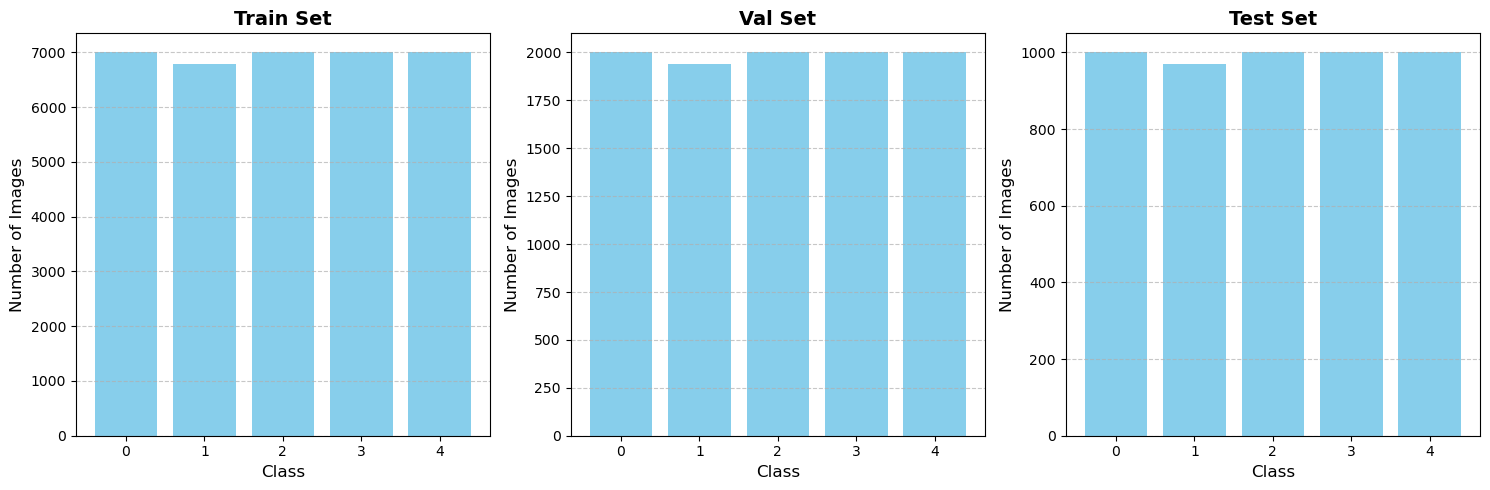

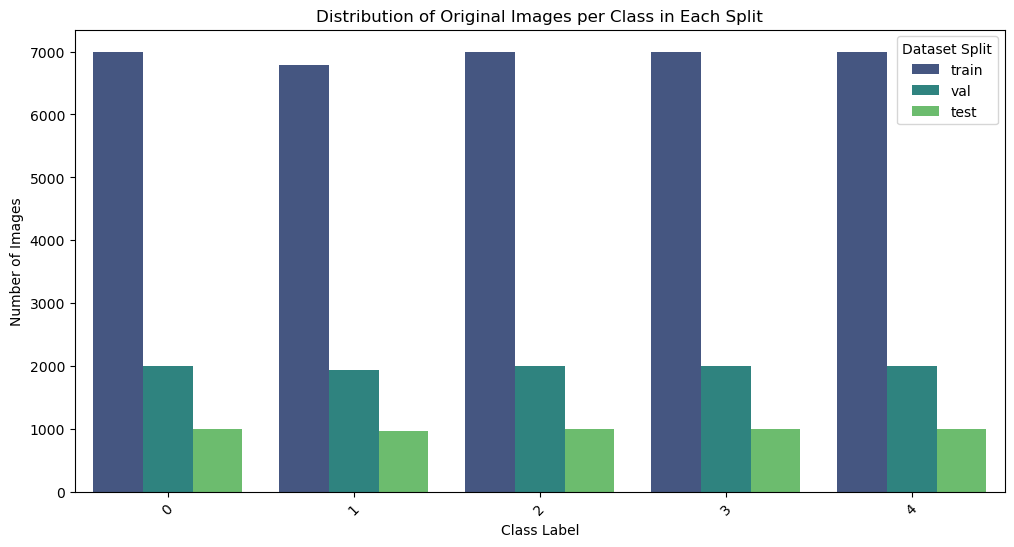

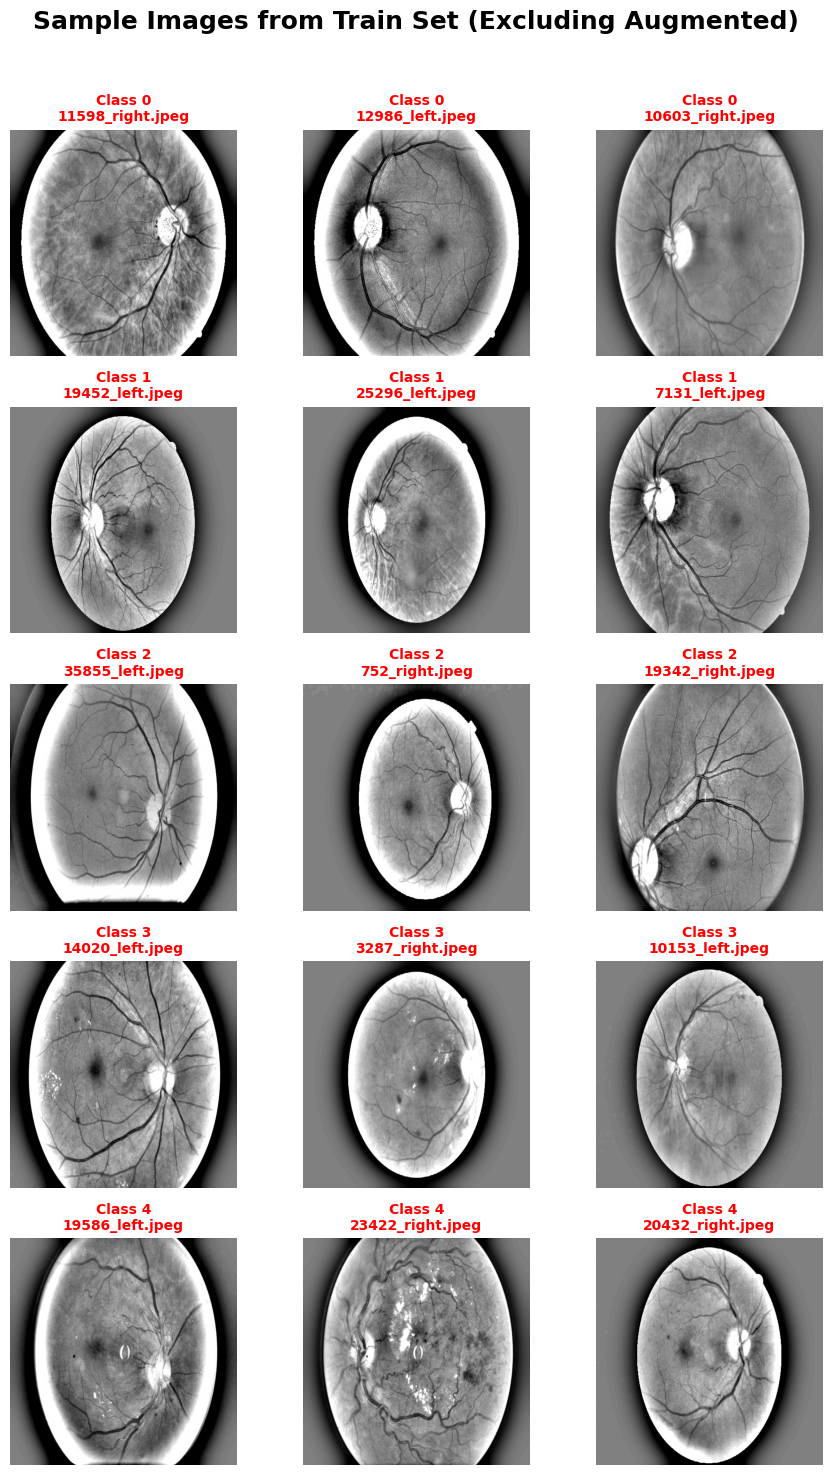

In [54]:
# Set dataset path
base_path = r"C:\Users\moawi\Downloads\archive\content\Diabetic_Balanced_Data"
SPLITS = ["train", "val", "test"]
# Run the functions
plot_dataset_distribution(base_path)
plot_class_distribution(df_images)
show_sample_images(base_path, dataset_type="train", num_samples=3)

## Defining Model Architecture

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.morphology import disk, white_tophat
from transformers import ViTModel, ViTFeatureExtractor
from torchvision import models  # ✅ Fix missing import

# Load ViT feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

# White Top-Hat Transformation
def apply_white_tophat(image, radius=10):
    tophat_img = white_tophat(image, disk(radius))
    tophat_img = (tophat_img - tophat_img.min()) / (tophat_img.max() - tophat_img.min())
    return (tophat_img * 255).astype(np.uint8)

# Apply CLAHE
def apply_clahe(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
    return clahe.apply(img)

# Custom Dataset Class
class FrameDataset(Dataset):
    def __init__(self, df, transform=None):
        self.data = df
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx]['Image Path']
        label = self.data.iloc[idx]['Label']
        label = torch.tensor(label, dtype=torch.long)

        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise ValueError(f"Image at {img_path} not found!")

        # image = apply_white_tophat(image)
        # image = apply_clahe(image)
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

        if self.transform:
            image = self.transform(image)

        return image, label

# Data Preprocessing
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std),
])



class ViT_CNN_Hybrid2(nn.Module):
    def __init__(self, num_classes):
        super(ViT_CNN_Hybrid2, self).__init__()

        # Load Pretrained ViT Model
        self.vit = ViTModel.from_pretrained("WinKawaks/vit-tiny-patch16-224")
        self.vit_fc = nn.Sequential(
            nn.Linear(self.vit.config.hidden_size, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

        # CNN Feature Extractor (ResNet18)
        resnet = models.resnet18(pretrained=True)
        self.cnn = nn.Sequential(*list(resnet.children())[:-1])  # Remove last FC layer
        self.cnn_fc = nn.Sequential(
            nn.Linear(resnet.fc.in_features, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

        # Fully Connected Layer for Classification
        self.classifier = nn.Sequential(
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)  # Final classification layer
        )

    def forward(self, x):
        # ViT Forward Pass
        vit_features = self.vit(x).last_hidden_state[:, 0, :]  # CLS token output
        vit_features = self.vit_fc(vit_features)

        # CNN Forward Pass
        cnn_features = self.cnn(x)
        cnn_features = cnn_features.view(cnn_features.size(0), -1)  # Flatten
        cnn_features = self.cnn_fc(cnn_features)

        # Concatenate Features
        fused_features = torch.cat((vit_features, cnn_features), dim=1)

        # Final Classification
        output = self.classifier(fused_features)
        return output


C:\Users\moawi\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
C:\Users\moawi\anaconda3\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


## Data Loaders

In [5]:
# Load dataset (Fix `df_images` reference)
df = df_images
df['Label'] = df['Label'].astype(int)  # ✅ Convert column to integers

# Split dataset based on "Split" column
train_df = df[df["Split"] == "train"]
val_df = df[df["Split"] == "val"]
test_df = df[df["Split"] == "test"]
        
# Load Data
train_dataset = FrameDataset(train_df, transform=transform)
val_dataset = FrameDataset(val_df, transform=transform)
test_dataset = FrameDataset(test_df, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# Model, Loss, and Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(train_df['Label'].unique())

## Training Loop

In [4]:


vit_model = ViT_CNN_Hybrid2(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vit_model.parameters(), lr=1e-4)  # ✅ Fix incorrect model reference

# Training Loop with Validation and Checkpointing
num_epochs = 10
best_val_acc = 0.0
checkpoint_path = "vit_best_model.pth"

for epoch in range(num_epochs):
    vit_model.train()
    total_loss = 0
    correct, total = 0, 0

    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = vit_model(images)  
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}%")

    # Validation
    vit_model.eval()
    correct, total = 0, 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = vit_model(images)  
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_acc = 100 * correct / total
    print(f"Validation Accuracy: {val_acc:.2f}%")

    # Save checkpoint if accuracy improves
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(vit_model.state_dict(), checkpoint_path)
        print(f"Checkpoint saved with validation accuracy: {best_val_acc:.2f}%")


C:\Users\moawi\anaconda3\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
C:\Users\moawi\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of ViTModel were not initialized from the model checkpoint at WinKawaks/vit-tiny-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\moawi\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be rem

Epoch [1/10], Loss: 1.0178, Train Acc: 55.69%
Validation Accuracy: 61.89%
Checkpoint saved with validation accuracy: 61.89%


100%|██████████████████████████████████████████████████████████████████████████████| 1088/1088 [04:43<00:00,  3.83it/s]


Epoch [2/10], Loss: 0.7998, Train Acc: 66.45%
Validation Accuracy: 64.97%
Checkpoint saved with validation accuracy: 64.97%


100%|██████████████████████████████████████████████████████████████████████████████| 1088/1088 [04:45<00:00,  3.81it/s]


Epoch [3/10], Loss: 0.6143, Train Acc: 74.59%
Validation Accuracy: 67.47%
Checkpoint saved with validation accuracy: 67.47%


100%|██████████████████████████████████████████████████████████████████████████████| 1088/1088 [04:42<00:00,  3.86it/s]


Epoch [4/10], Loss: 0.4582, Train Acc: 81.47%
Validation Accuracy: 71.89%
Checkpoint saved with validation accuracy: 71.89%


100%|██████████████████████████████████████████████████████████████████████████████| 1088/1088 [04:44<00:00,  3.82it/s]


Epoch [5/10], Loss: 0.3090, Train Acc: 88.11%
Validation Accuracy: 71.13%


100%|██████████████████████████████████████████████████████████████████████████████| 1088/1088 [04:42<00:00,  3.85it/s]


Epoch [6/10], Loss: 0.2044, Train Acc: 92.44%
Validation Accuracy: 72.10%
Checkpoint saved with validation accuracy: 72.10%


100%|██████████████████████████████████████████████████████████████████████████████| 1088/1088 [04:43<00:00,  3.84it/s]


Epoch [7/10], Loss: 0.1492, Train Acc: 94.64%
Validation Accuracy: 70.92%


100%|██████████████████████████████████████████████████████████████████████████████| 1088/1088 [04:42<00:00,  3.86it/s]


Epoch [8/10], Loss: 0.1230, Train Acc: 95.66%
Validation Accuracy: 70.44%


100%|██████████████████████████████████████████████████████████████████████████████| 1088/1088 [04:43<00:00,  3.84it/s]


Epoch [9/10], Loss: 0.1086, Train Acc: 96.23%
Validation Accuracy: 72.39%
Checkpoint saved with validation accuracy: 72.39%


100%|██████████████████████████████████████████████████████████████████████████████| 1088/1088 [04:45<00:00,  3.81it/s]


Epoch [10/10], Loss: 0.0918, Train Acc: 96.77%
Validation Accuracy: 71.70%


## Testing and Visualisation

Test Accuracy: 0.7172

Classification Report:
                   precision    recall  f1-score   support

           No DR       0.54      0.69      0.60      1000
            Mild       0.63      0.61      0.62       971
        Moderate       0.62      0.46      0.53      1000
          Severe       0.89      0.90      0.90      1000
Proliferative DR       0.92      0.93      0.92      1000

        accuracy                           0.72      4971
       macro avg       0.72      0.72      0.71      4971
    weighted avg       0.72      0.72      0.71      4971



C:\Users\moawi\AppData\Local\Temp\ipykernel_32560\3893392200.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([' '] + list(class_mapping.values()), fontsize=14)
C:\Users\moawi\AppData\Local\Temp\ipykernel_32560\3893392200.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + list(class_mapping.values()), fontsize=14)


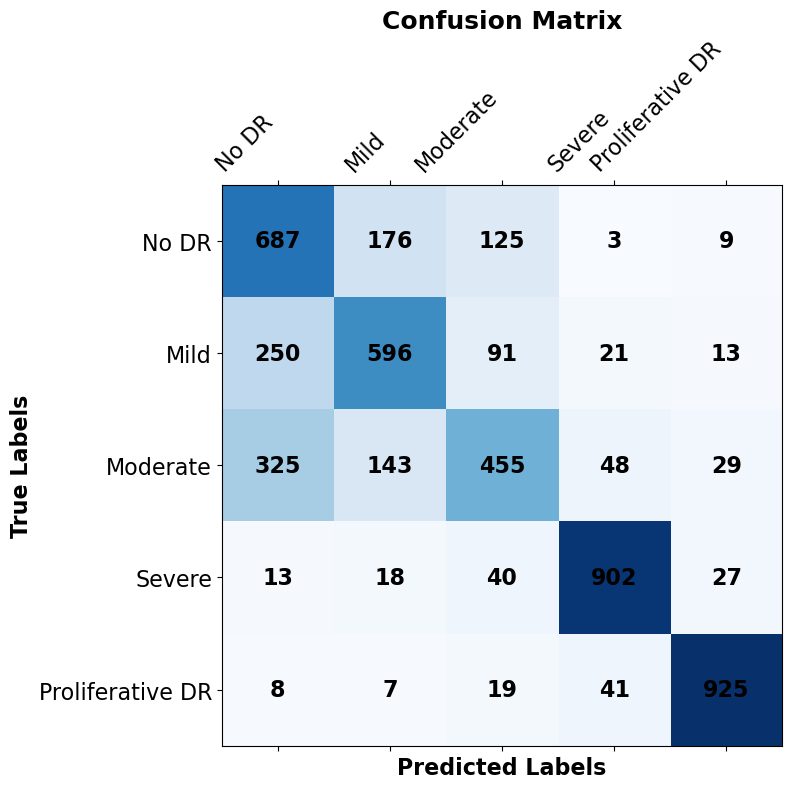

In [46]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from PIL import Image
from torchvision import transforms



def test_model(model, dataloader, class_mapping, device, num_examples=6):
    model.eval()
    all_labels, all_preds = [], []
    test_images, test_labels, test_preds = [], [], []
    
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            # Store results
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

            # Collect examples for visualization
            if len(test_images) < num_examples:
                test_images.extend(images.cpu().numpy())
                test_labels.extend(labels.cpu().numpy())
                test_preds.extend(preds.cpu().numpy())

    # Convert to numpy arrays
    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    # Accuracy and Classification Report
    acc = accuracy_score(all_labels, all_preds)
    print(f"Test Accuracy: {acc:.4f}")
    print("\nClassification Report:\n", classification_report(all_labels, all_preds, target_names=list(class_mapping.values())))

    # **✅ Confusion Matrix Plot**
    plot_confusion_matrix(all_labels, all_preds, class_mapping)


def plot_confusion_matrix(all_labels, all_preds, class_mapping):
    conf_matrix = confusion_matrix(all_labels, all_preds)
    
    fig, ax = plt.subplots(figsize=(10, 8))  # Bigger figure for better visibility
    cax = ax.matshow(conf_matrix, cmap='Blues')

    # Axis Labels
    ax.set_xticklabels([' '] + list(class_mapping.values()), fontsize=14)
    ax.set_yticklabels([''] + list(class_mapping.values()), fontsize=14)

    # Add labels and numbers inside matrix
    for i in range(len(conf_matrix)):
        for j in range(len(conf_matrix[i])):
            ax.text(j, i, conf_matrix[i, j], ha='center', va='center', fontsize=16, fontweight='bold')

    # Titles and formatting
    plt.xlabel("Predicted Labels", fontsize=16, fontweight='bold')
    plt.ylabel("True Labels", fontsize=16, fontweight='bold')
    plt.title("Confusion Matrix", fontsize=18, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    plt.show()

# **✅ Run the test function**
class_mapping = {
    0: "No DR",
    1: "Mild",
    2: "Moderate",
    3: "Severe",
    4: "Proliferative DR"
}

test_model(vit_model, test_loader, class_mapping, device)


## Model Explainability

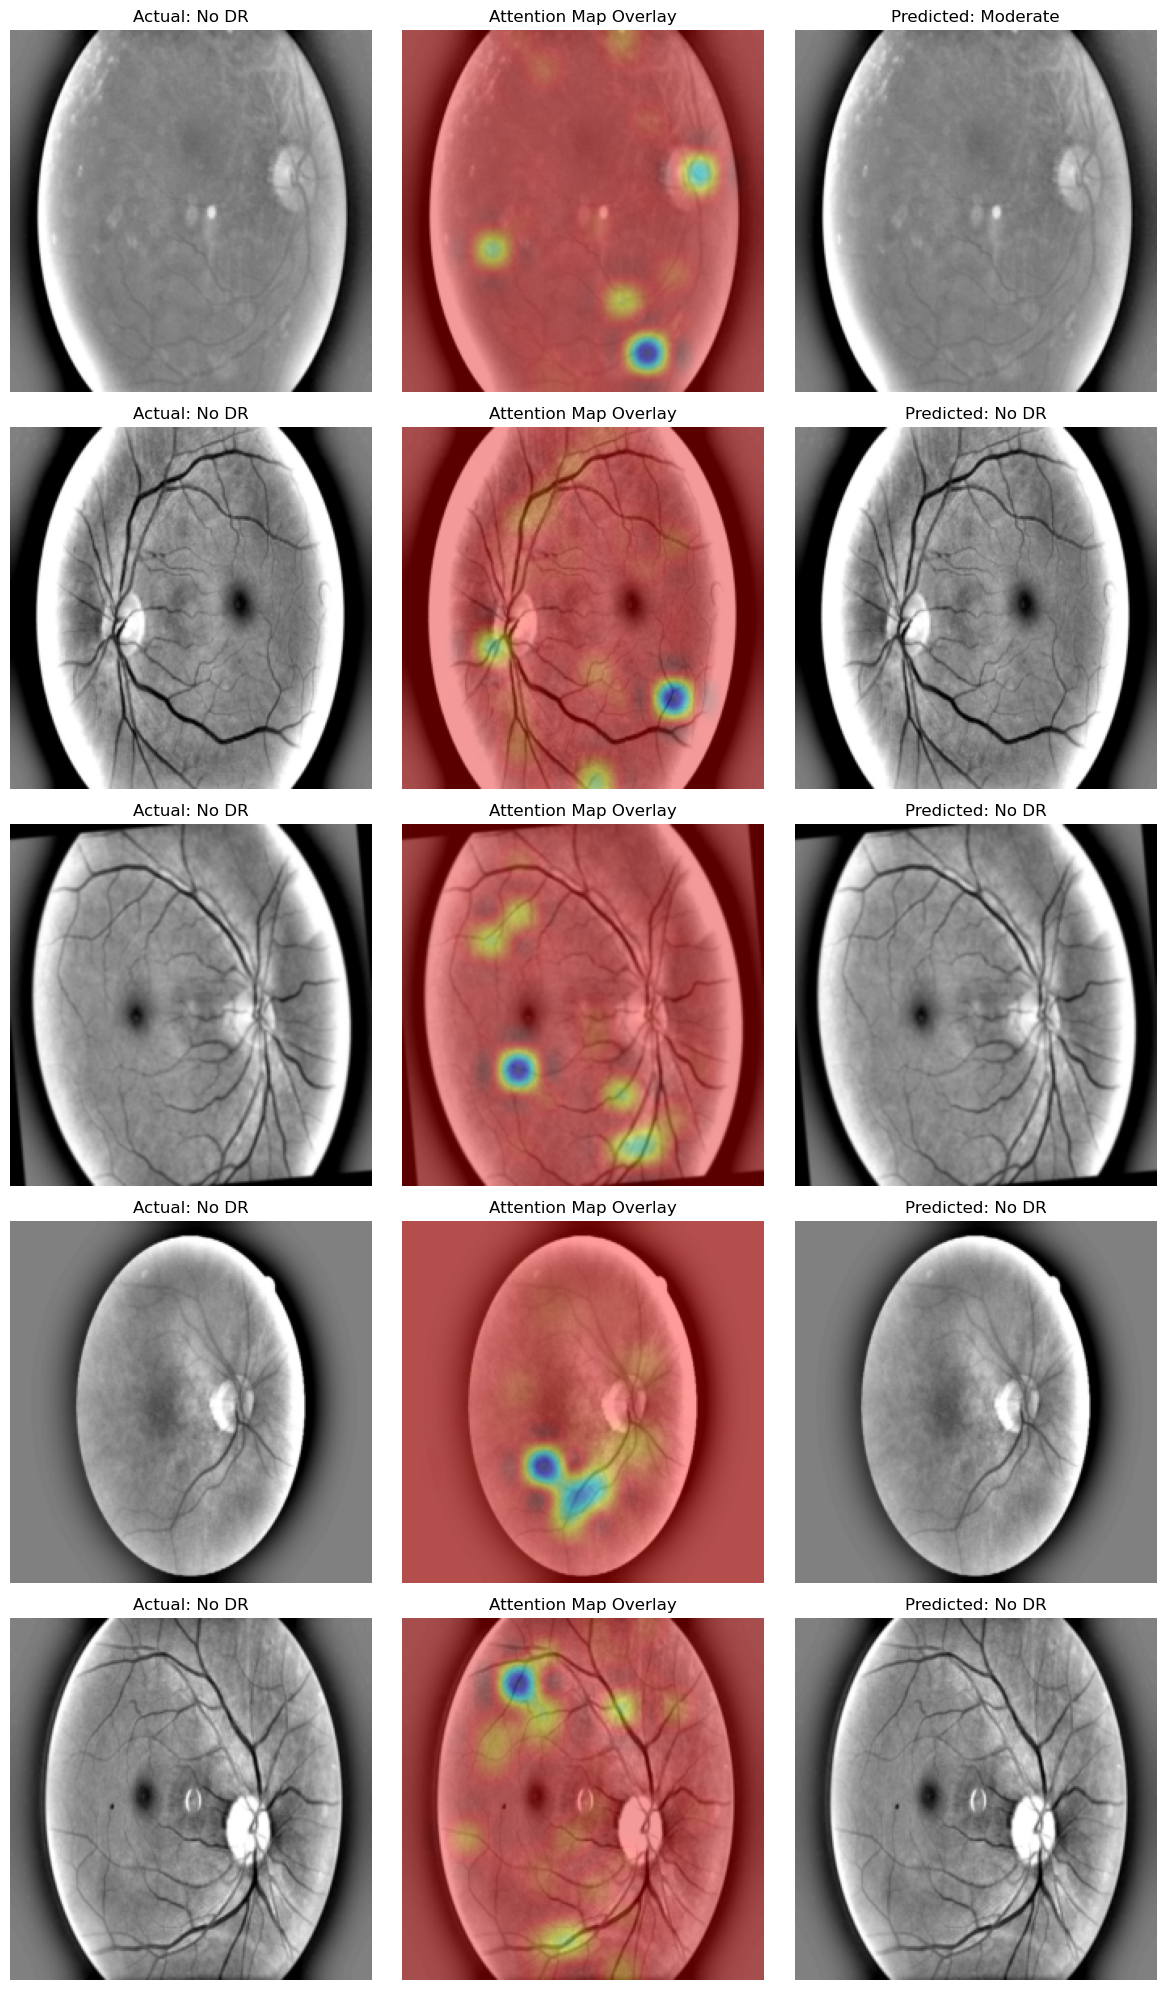

In [44]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2

def visualize_predictions_with_attention(test_loader, model, class_mapping, device, num_examples=5):
    model.eval()  # Set the model to evaluation mode
    
    # Prepare the figure for visualization
    fig, axes = plt.subplots(num_examples, 3, figsize=(12, 4 * num_examples))
    if num_examples == 1:  
        axes = np.expand_dims(axes, axis=0)  # Ensure indexing works for a single sample

    with torch.no_grad():
        count = 0
        for idx, (images, labels) in enumerate(test_loader):
            # Move data to the same device as the model
            images, labels = images.to(device), labels.to(device)

            # Make predictions
            preds = model(images)
            _, preds = torch.max(preds, 1)  # Get the predicted class labels

            for img, label, pred in zip(images, labels, preds):
                if count >= num_examples:  # Stop once we visualize 'num_examples' images
                    break

                img_vis = img.cpu().numpy().transpose((1, 2, 0))  # Convert (C, H, W) -> (H, W, C)
                img_vis = (img_vis - img_vis.min()) / (img_vis.max() - img_vis.min())  # Normalize for visualization

                # Get Attention Map
                img_tensor = img.unsqueeze(0).to(device)
                vit_outputs = model.vit(img_tensor, output_attentions=True)  # ViT model
                attentions = vit_outputs.attentions[-1].cpu().numpy().mean(axis=1).squeeze(0)
                attention_map = attentions[0, 1:].reshape(14, 14)  # Remove CLS token
                attention_map = cv2.resize(attention_map, (224, 224), interpolation=cv2.INTER_CUBIC)

                # Normalize attention map
                attention_map = (attention_map - attention_map.min()) / (attention_map.max() - attention_map.min())
                heatmap = cv2.applyColorMap(np.uint8(255 * attention_map), cv2.COLORMAP_JET)

                # Overlay Attention Map
                overlay = cv2.addWeighted(np.uint8(img_vis * 255), 0.6, heatmap, 0.4, 0)

                # Plot images
                axes[count, 0].imshow(img_vis)
                axes[count, 0].set_title(f"Actual: {class_mapping[label.item()]}")
                axes[count, 0].axis("off")

                axes[count, 1].imshow(overlay)
                axes[count, 1].set_title("Attention Map Overlay")
                axes[count, 1].axis("off")

                axes[count, 2].imshow(img_vis)
                axes[count, 2].set_title(f"Predicted: {class_mapping[pred.item()]}")
                axes[count, 2].axis("off")

                count += 1

            # Stop if we've reached the specified number of examples
            if count >= num_examples:
                break

    plt.tight_layout()
    plt.show()

# Define class mapping
class_mapping = {
    0: "No DR",
    1: "Mild",
    2: "Moderate",
    3: "Severe",
    4: "Proliferative DR"
}
visualize_predictions_with_attention(test_loader, model, class_mapping, device, num_examples=5)

## GPU Accelerated Inference Time

In [10]:
import time
import torch
from torchvision import models, transforms
from PIL import Image

# Assuming you have a ViT model
# model = vit_model  # Replace with your custom ViT-CNN hybrid model if needed
model.eval()

# Prepare your image
img_path = test_dataset.data.iloc[1000]['Image Path']
img = Image.open(img_path)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
img_tensor = transform(img).unsqueeze(0)

# Measure inference time
start_time = time.time()
with torch.no_grad():
    output = model(img_tensor.to("cuda"))
end_time = time.time()

inference_time = end_time - start_time
print(f"Inference time: {inference_time:.4f} seconds")


Inference time: 0.0360 seconds


## Saving Final Model

In [37]:
import torch

# Save the model's state_dict
def save_model(model, file_path):
    torch.save(model.state_dict(), file_path)
    print(f"Model saved to {file_path}")

# Example usage:
file_path = r'C:\Users\moawi\Downloads\archive\model\vit_cnn_hybrid.pth'  # Specify the file path where the model will be saved
save_model(vit_model, file_path)


Model saved to C:\Users\moawi\Downloads\archive\model\vit_cnn_hybrid.pth
